In [4]:
import pandas as pd

In [7]:
df = pd.read_csv("../data/prices_export.csv")

In [9]:
df.head()

,id,product,price,currency,source,date
0,1,Asus VivoBook...,$295.99,USD,ExampleShop1,2025-10-06 21:44:10.262799
1,2,Prestigio Smar...,$299,USD,ExampleShop1,2025-10-06 21:44:10.280808
2,3,Prestigio Smar...,$299,USD,ExampleShop1,2025-10-06 21:44:10.291149
3,4,Aspire E1-510,$306.99,USD,ExampleShop1,2025-10-06 21:44:10.302621
4,5,Lenovo V110-15...,$321.94,USD,ExampleShop1,2025-10-06 21:44:10.312747


In [12]:
df.describe()

,id
count,427.000000
mean,214.648712
std,124.544327
min,1.000000
25%,107.500000
50%,214.000000
75%,320.500000
max,449.000000


In [23]:
df["price"] = df[df["price"], dtype="int64"]

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1126720413.py, line 1)

In [14]:
import numpy as np
df = np.avg(df)

AttributeError: 'DataFrame' object has no attribute 'avg'

In [10]:
from app.utils import clean_price

df["price_clean"] = df["price"].apply(lambda x: clean_price(str(x)))
df.drop_duplicates(inplace=True)
df.head()

ImportError: cannot import name 'clean_price' from 'app.utils' (/data/data/com.termux/files/home/projects/price_track1/app/utils.py)

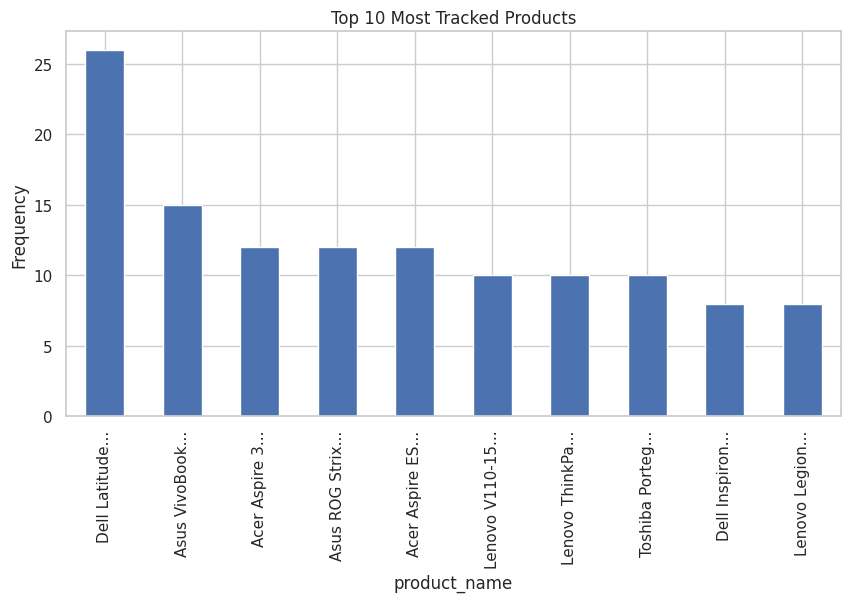

In [31]:
import matplotlib.pyplot as plt

# Top 10 most frequent products
top_products = df["product_name"].value_counts().head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind="bar")
plt.title("Top 10 Most Tracked Products")
plt.ylabel("Frequency")
plt.show()

In [34]:
df["created_at"] = pd.to_datetime(df["created_at"])
trend = df.groupby(df["created_at"].dt.date)["price_clean"].mean()

trend.plot(figsize=(10,5), title="Average Price Trend Over Time")
plt.ylabel("Average Price")
plt.show()

ValueError: time data "2025-10-05T09:21:00.918111+00:00" doesn't match format "%Y-%m-%d %H:%M:%S.%f%z", at position 3. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [35]:
os.makedirs("../data/clean", exist_ok=True)
df.to_csv("../data/clean/prices_clean.csv", index=False)
print("✅ Cleaned data saved to data/clean/prices_clean.csv")

✅ Cleaned data saved to data/clean/prices_clean.csv


In [36]:
%run ../main.py

✅ Scraping completed successfully.
